In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Dataset and making ‘PassengerId’ as the index column :

In [2]:
data = pd.read_csv('titanic_dataset.csv',index_col = 'PassengerId')

#### Basic Detail Check :

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [5]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### Filling Missing values :

In [6]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [7]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

In [8]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [9]:
data.isna().sum()  # Checking if all the missing values are filled

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

#### Outlier Handling in column 'Age' :

Text(0.5, 1.0, 'Boxplot of Age column')

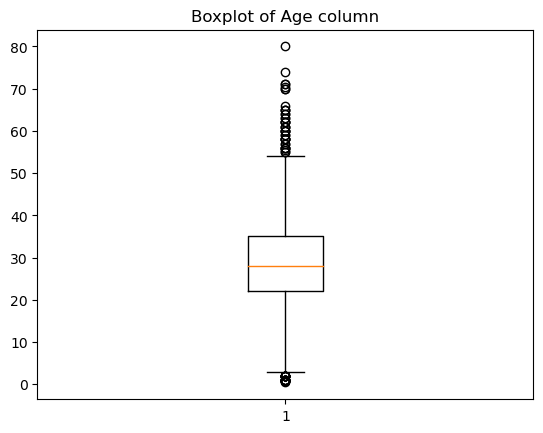

In [10]:
plt.boxplot(data['Age'])
plt.title('Boxplot of Age column')

In [11]:
Q1 = np.percentile(data['Age'],25, interpolation ='midpoint')
Q2 = np.percentile(data['Age'],50, interpolation ='midpoint')
Q3 = np.percentile(data['Age'],75, interpolation ='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR

In [12]:
low_limit

2.5

In [13]:
up_limit

54.5

In [14]:
ind = data['Age']>up_limit
a = data.loc[ind].index
ind2 = data['Age']<low_limit
b = data.loc[ind2].index

In [15]:
data.drop(a, inplace = True)

In [16]:
data.drop(b, inplace = True)

In [17]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C


#### Outlier Handling in column 'Fare' :

Text(0.5, 1.0, 'Boxplot of Fare column')

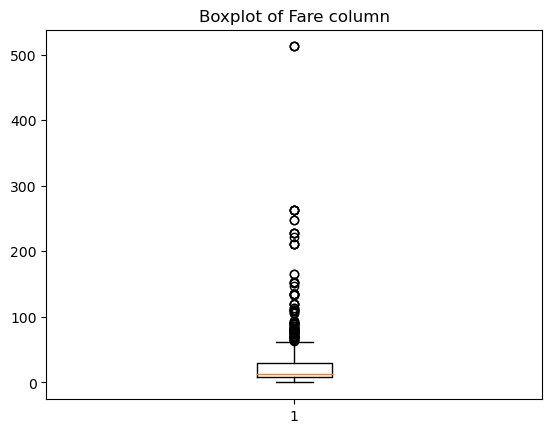

In [18]:
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare column')

In [19]:
Q1 = np.percentile(data['Fare'],25, interpolation ='midpoint')
Q2 = np.percentile(data['Fare'],50, interpolation ='midpoint')
Q3 = np.percentile(data['Fare'],75, interpolation ='midpoint')
IQR = Q3-Q1
up_limit = Q3+1.5*IQR

In [20]:
ind = data['Fare']>up_limit
c = data.loc[ind].index

In [21]:
up_limit

63.333299999999994

In [22]:
data.drop(c, inplace = True)

In [23]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


#### Outlier Handling in column 'SibSp' :

Text(0.5, 1.0, 'Boxplot of SibSp column')

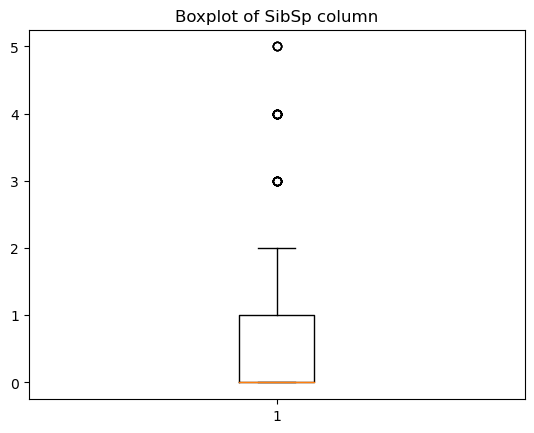

In [24]:
plt.boxplot(data['SibSp'])
plt.title('Boxplot of SibSp column')

In [25]:
Q1 = np.percentile(data['SibSp'],25, interpolation ='midpoint')
Q2 = np.percentile(data['SibSp'],50, interpolation ='midpoint')
Q3 = np.percentile(data['SibSp'],75, interpolation ='midpoint')
IQR = Q3-Q1
up_limit = Q3+1.5*IQR

In [26]:
up_limit

2.5

In [27]:
ind = data['SibSp']>up_limit
d = data.loc[ind].index

In [28]:
d

Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],
           dtype='int64', name='PassengerId')

In [29]:
data.drop(d, inplace = True)

In [30]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


#### MinMax Scaling :

In [42]:
X = data['Survived']
X = pd.DataFrame(X)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
minmax = MinMaxScaler(feature_range=(0,1))

In [46]:
X1 = minmax.fit_transform(X)
X1 = pd.DataFrame(X1)

In [47]:
X1.describe()

,0
count,689.000000
mean,0.341074
std,0.474415
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000
